In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("add.csv")

In [3]:
df.head()

x     y   sum
0   1.0   1.0   2.0
1   4.0   4.0   8.0
2   6.0   6.0  12.0
3  10.0  10.0  20.0
4  30.0  30.0  60.0

In [4]:
df.shape

(22, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       22 non-null     float64
 1   y       22 non-null     float64
 2   sum     22 non-null     float64
dtypes: float64(3)
memory usage: 660.0 bytes


In [6]:
df.describe()

x            y          sum
count    22.000000    22.000000    22.000000
mean    136.786364   248.686364   385.472727
std     229.622745   732.554988   938.706461
min       1.000000     1.000000     2.000000
25%      15.500000    31.000000    66.500000
50%      40.150000    56.800000   117.450000
75%     175.000000    85.925000   245.975000
max    1000.000000  3456.000000  4456.000000

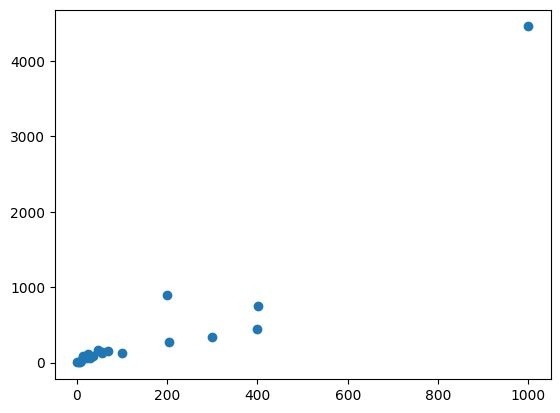

In [7]:
plt.scatter(df["x"], df["sum"])

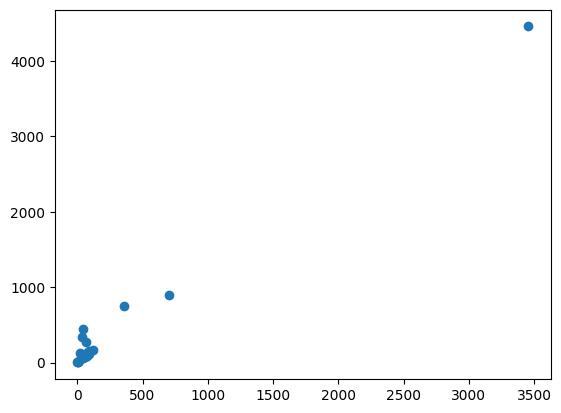

In [8]:
plt.scatter(df["y"], df["sum"])

# How data looks like in 3D

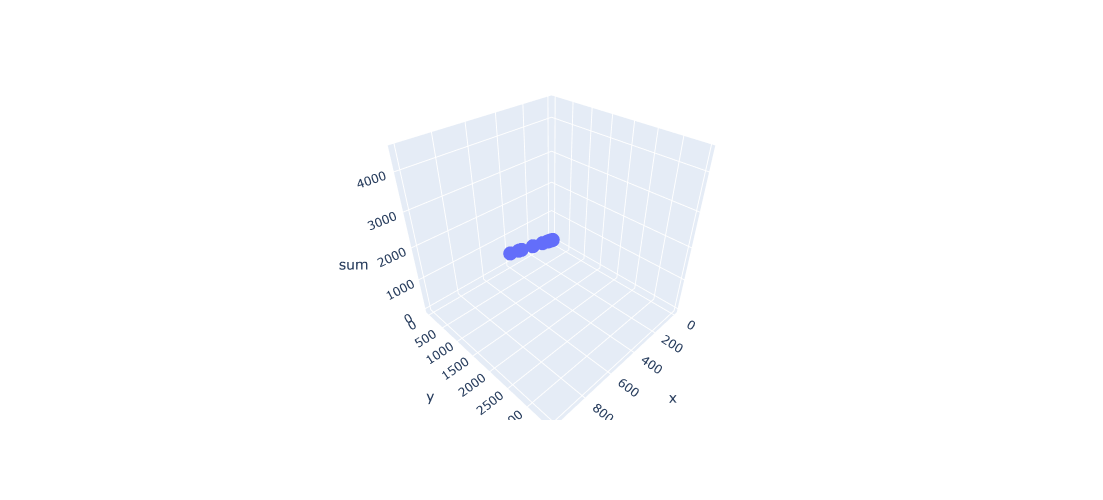

In [9]:
fig = px.scatter_3d(df, x = "x", y="y", z = "sum", width=800, height=500)
fig.show()

In [10]:
df["x"].unique

<bound method Series.unique of 0        1.0
1        4.0
2        6.0
3       10.0
4       30.0
5       23.0
6       55.0
7      100.0
8       23.0
9       56.0
10      13.0
11     300.0
12      12.5
13      23.6
14      67.8
15     200.0
16     203.6
17     400.0
18      34.6
19     400.5
20      45.7
21    1000.0
Name: x, dtype: float64>

In [11]:
df["y"].unique

<bound method Series.unique of 0        1.0
1        4.0
2        6.0
3       10.0
4       30.0
5       43.0
6       80.0
7       22.0
8       45.0
9       78.0
10      78.0
11      34.0
12      56.7
13      89.3
14      87.9
15     700.0
16      67.9
17      45.7
18      56.9
19     356.0
20     123.7
21    3456.0
Name: y, dtype: float64>

In [12]:
df = df[df["x"] <= 500]

In [13]:
df = df[df["y"] <= 600]

In [14]:
df.shape

(20, 3)

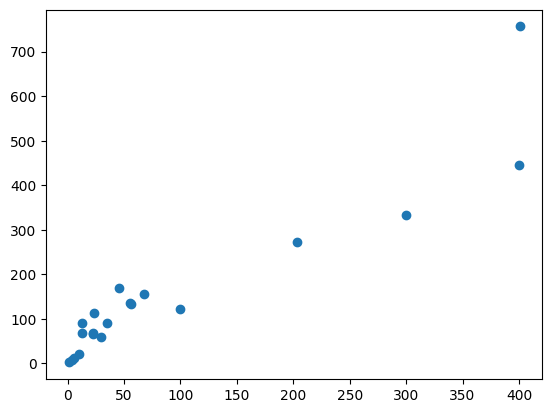

In [15]:
plt.scatter(df["x"], df["sum"])

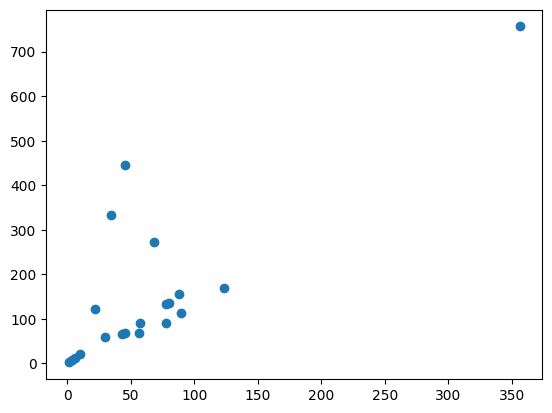

In [16]:
plt.scatter(df["y"], df["sum"])

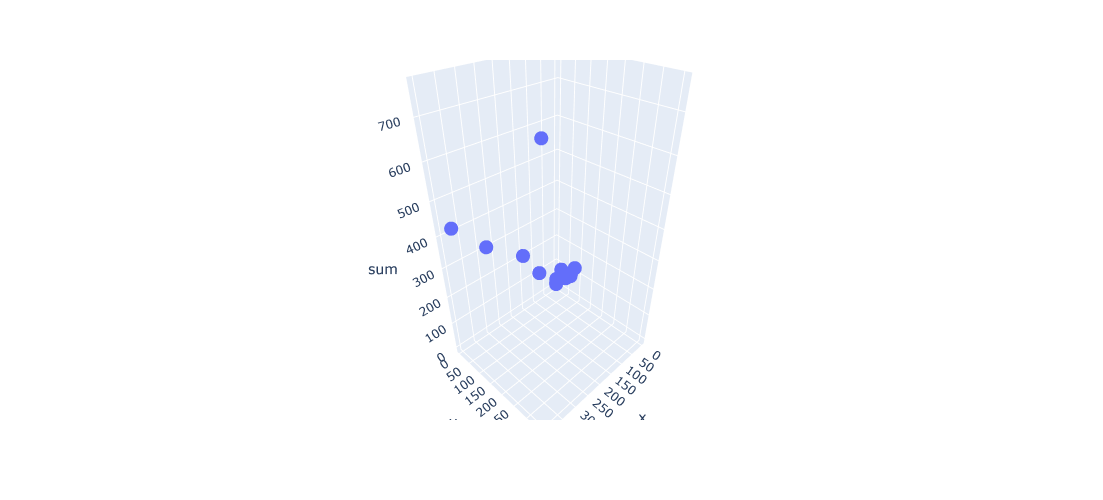

In [17]:
fig = px.scatter_3d(df, x = "x", y="y", z = "sum", width=800, height=500)
fig.show()

In [18]:
# Now we will split our data into training set and testing set

In [19]:
df.iloc[:,0:2]

x      y
0     1.0    1.0
1     4.0    4.0
2     6.0    6.0
3    10.0   10.0
4    30.0   30.0
5    23.0   43.0
6    55.0   80.0
7   100.0   22.0
8    23.0   45.0
9    56.0   78.0
10   13.0   78.0
11  300.0   34.0
12   12.5   56.7
13   23.6   89.3
14   67.8   87.9
16  203.6   67.9
17  400.0   45.7
18   34.6   56.9
19  400.5  356.0
20   45.7  123.7

In [20]:
X = df.iloc[:,0:2]
y = df["sum"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [22]:
X_train.shape

(16, 2)

In [23]:
X_test.shape

(4, 2)

# Now we will create and train our model

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test)

In [27]:
print("R2 score: ",r2_score(y_test, y_pred))
print("mean_absolute_error : ",mean_absolute_error(y_test, y_pred))
print("mean_squared_error : ",mean_squared_error(y_test, y_pred))

R2 score:  1.0
mean_absolute_error :  2.1316282072803006e-14
mean_squared_error :  6.058451752097371e-28


In [28]:
mesh_size = .02
margin = 0
x_min, x_max = X.x.min() - margin, X.x.max() + margin
y_min, y_max = X.y.min() - margin, X.y.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

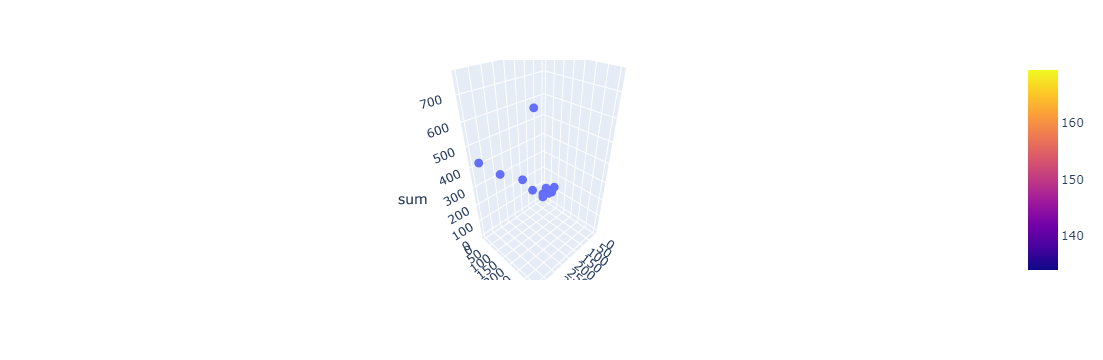

In [29]:
fig = px.scatter_3d(df, x='x', y='y', z='sum')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=y_pred, name='pred_surface'))
fig.show()

In [31]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

XGrid , yGrid = np.meshgrid(y, x)

final = np.vstack((XGrid.ravel().reshape(1,100), (yGrid.ravel().reshape(1,100)))).T

z_final = lr.predict(final).reshape(10,10)

z = z_final

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



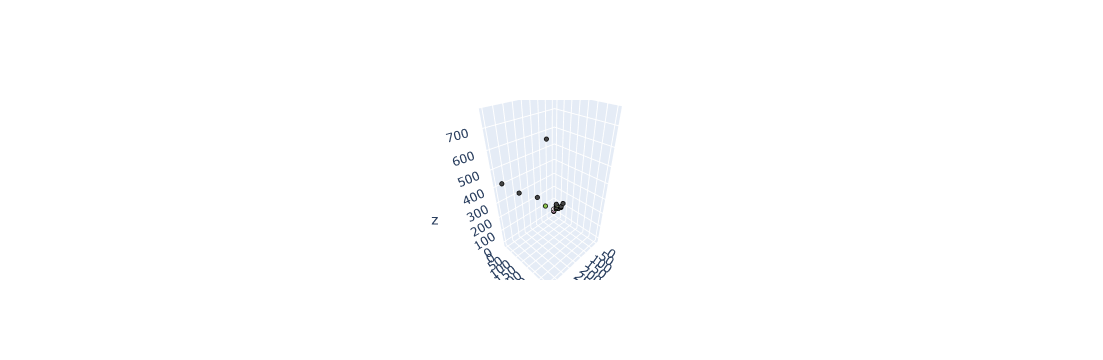

In [33]:
go.Figure([go.Scatter3d(x=df.iloc[:,0], y=df.iloc[:,1], z=df.iloc[:,2], mode="markers", showlegend=False,
                        marker=dict(color=y, size=2.5, line=dict(color="black", width=1))),
           go.Surface(x=x, y=y, z=z, opacity=.5, showscale=False,
                      surfacecolor=np.zeros(z.shape), colorscale=[[0, 'grey']])])

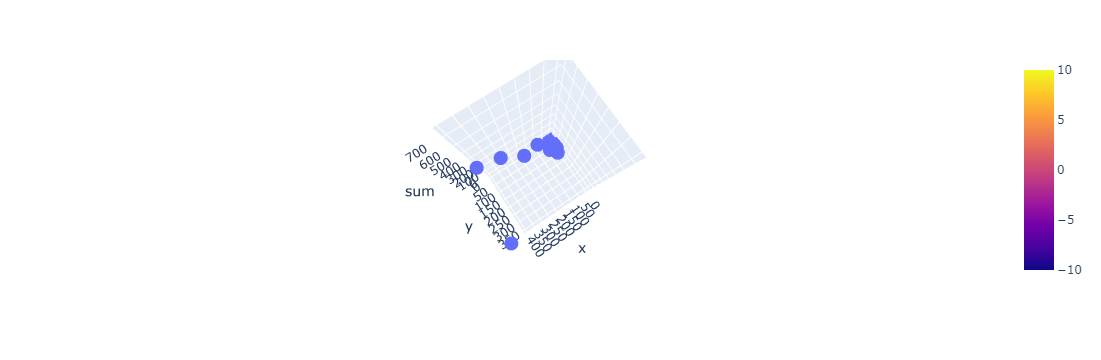

In [34]:
fig = px.scatter_3d(df, x= "x", y= "y", z="sum")
fig.add_trace(go.Surface(x=x, y=y, z=z))
fig.show()

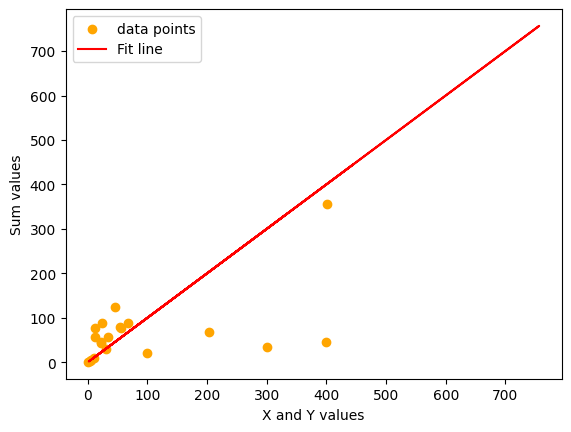

In [44]:
plt.scatter(df["x"], df["y"], c= "orange", label='data points')
#plt.scatter(df[["x","y"]], df["sum"], c = "red", label = "data1 points")
plt.plot(y_train, lr.predict(X_train), color='red', label='Fit line')

plt.xlabel('X and Y values')
plt.ylabel('Sum values')
plt.legend()
plt.show()

# Now we will dump our model

In [45]:
import pickle

In [46]:
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [47]:
with open('model.pkl', 'rb') as file:
    lr = pickle.load(file)